In [ ]:
!pip install opencv-contrib-python

In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-09-10 06:05:27--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0 [following]
--2024-09-10 06:05:27--  https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba93160d494c0a1b565d5ad735.dl.dropboxusercontent.com/cd/0/inline/CaQvrQCMR5uJOQtrnXvfnnRj4CYxVWM5xii_tG8QZ8x9mFED4XUHlMHfnZeNCKoKvt8hYAudOYzxMmBtzCaL429OShFnZbb0S-si2Y2ZKHPsY7105AlvhOYUdywuSqQUBLv_uZJvg-N4cb08cnh2afeo/file# [following]
--2024-09-10 06:05:28--  https://ucba93160d494c0a1b565d5ad735.dl.dropboxusercontent.com/c

In [ ]:
#8

# Same problem with me and then I change it and its working!

# for keras-3.0.5 & tensorflow-2.16.1 the way for importing ImageDataGenerator is

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.api.preprocessing.image import load_img, img_to_array
from keras.src.layers import  Flatten, Dense
from keras.api.models import Model
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.api.applications.mobilenet import MobileNet, preprocess_input
from keras.api.losses import categorical_crossentropy

# from keras.layers import Flatten, Dense
# from keras.models import Model
# from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
# from keras.applications.mobilenet import MobileNet, preprocess_input
# from keras.losses import categorical_crossentropy
# from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [ ]:
# Working with pre trained model
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:

train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
train_data

NameError: name 'train_data' is not defined

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )
#/content/train
val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


In [ ]:
train_data.image_data_generator

# keras.src.legacy.preprocessing.image.DirectoryIterator
# def __init__(directory, image_data_generator, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, data_format=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False, dtype=None)
# /usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py
# Iterator capable of reading images from a directory on disk.

# DEPRECATED.

In [ ]:
# # to visualize the images in the traing data denerator

# t_img , label = train_data.next()

# #-----------------------------------------------------------------------------
# # function when called will prot the images
# def plotImages(img_arr, label):
#   """
#   input  :- images array
#   output :- plots the images
#   """
#   count = 0
#   for im, l in zip(img_arr,label) :
#     plt.imshow(im)
#     plt.title(im.shape)
#     plt.axis = False
#     plt.show()

#     count += 1
#     if count == 10:
#       break

# #-----------------------------------------------------------------------------
# # function call to plot the images
# plotImages(t_img, label)

In [ ]:

import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
## having early stopping and model check point

from keras.api.callbacks import ModelCheckpoint, EarlyStopping #import ModelCheckpoint, EarlyStopping
# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="EVModel.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit(train_data,
                           steps_per_epoch= 10,
                           epochs= 20,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1622 - loss: 19.0851
Epoch 1: val_accuracy improved from -inf to 0.28516, saving model to EVModel.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.1636 - loss: 19.3449 - val_accuracy: 0.2852 - val_loss: 14.6395
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2368 - loss: 11.9145
Epoch 2: val_accuracy improved from 0.28516 to 0.40625, saving model to EVModel.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2352 - loss: 11.9056 - val_accuracy: 0.4062 - val_loss: 8.4807
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3550 - loss: 8.5364
Epoch 3: val_accuracy improved from 0.40625 to 0.42188, saving model to EVModel.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3543 - loss: 8.4107 - val_accuracy: 0.4219 - val_loss: 5.6742
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3688 - loss: 6.6969
Epoch 4: val_accuracy improved from 0.42188 to 0.46484, saving model to EV

In [ ]:

import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

In [ ]:
# Loading the best fit model
from keras.api.models import load_model
model = load_model("/content/EVModel.keras")

In [ ]:
model.metrics

[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

In [ ]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

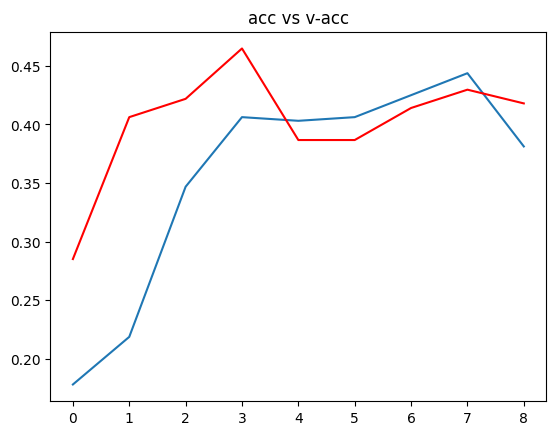

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

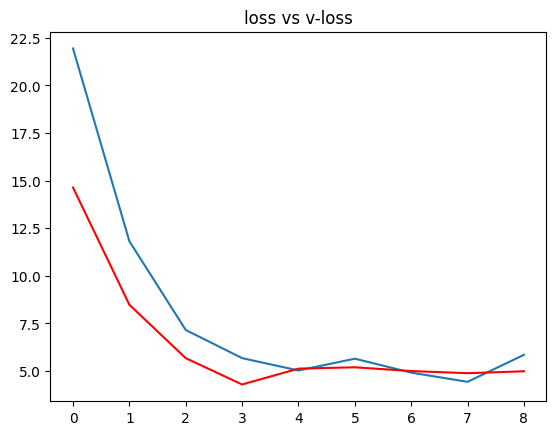

In [ ]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:

# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
op

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
 the image is of surprise


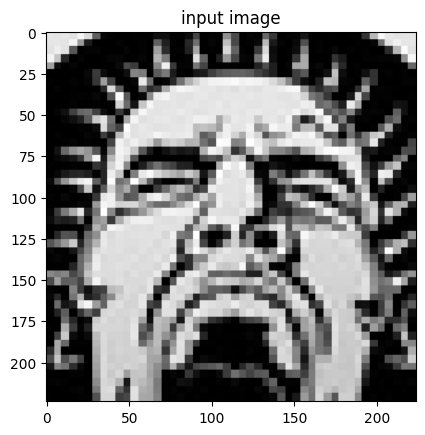

In [ ]:
# path for the image to see if it predics correct class
path = "/content/test/fear/PrivateTest_1161501.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

# NOW LOAD Model for FUTURE API reference cALL

In [ ]:
#!pip uninstall opencv-python
!pip install opencv-python==3.4.18.65
!pip install opencv-contrib-python==3.4.18.65

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==0.33.0
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.14
albumentations==1.4.14
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.1.3
astropy-iers-data==0.2024.8.27.10.28.29
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.15.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.2
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


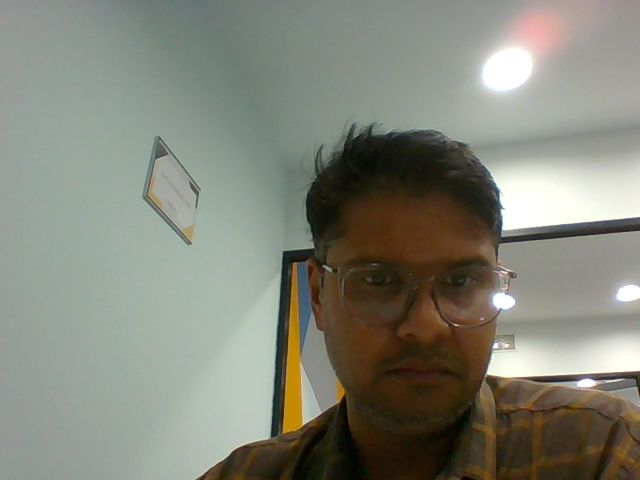

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install --upgrade opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 3.4.18.65
    Uninstalling opencv-python-3.4.18.65:
      Successfully uninstalled opencv-python-3.4.18.65


In [ ]:
import os
import cv2
import numpy as np
from keras.api.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.api.preprocessing.image import load_img, img_to_array
from keras.api.models import load_model
from keras.api.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os
os.environ["OPENCV_LOG_LEVEL"] = "debug" # value must be a string
os.environ["OPENCV_VIDEOIO_DEBUG"] = "1" # value must be a string

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:
face_haar_cascade.getFeatureType()

0

In [ ]:
# load model
#modelCV2 = load_model("EVModel.keras")

#load model
modelCV2 = model_from_json(open("/content/model.json", "r").read())
#load weights
#model.load_weights('model.h5')
modelCV2.load_weights('/content/EVModel.keras')

In [ ]:
modelCV2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,282,583 (16.34 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 702,480 (2.68 MB)

In [ ]:
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
cap = cv2.VideoCapture('/content/EVSales.mp4')

# Get the default frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))

In [ ]:
out

< cv2.VideoWriter 0x7c7fbf1c4570>

In [ ]:
#WORKING CODE FOR  DIRECT VIDEO SAMPLE INPUT------------

# if not cap.isOpened():
#     print("Cannot open camera")
#     exit()

# while True:
#     ret, frame = cap.read()

#     if not ret or frame is None:
#         print("Failed to grab frame. Exiting ...")
#         break

#     # Make sure frame is not empty before processing
#     if frame is not None:
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         cv2_imshow(gray)

#     if cv2.waitKey(1) == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [ ]:
a,b = cap.read()

In [ ]:
a

True

array([[[17, 14, 13],
        [17, 14, 13],
        [17, 14, 13],
        ...,
        [18, 17, 11],
        [18, 17, 11],
        [18, 17, 11]],

       [[17, 14, 13],
        [17, 14, 13],
        [17, 14, 13],
        ...,
        [18, 17, 11],
        [18, 17, 11],
        [18, 17, 11]],

       [[17, 14, 13],
        [17, 14, 13],
        [17, 14, 13],
        ...,
        [18, 17, 11],
        [18, 17, 11],
        [18, 17, 11]],

       ...,

       [[24, 20, 16],
        [24, 20, 16],
        [24, 20, 16],
        ...,
        [14, 11, 12],
        [14, 11, 12],
        [14, 11, 12]],

       [[24, 20, 16],
        [24, 20, 16],
        [24, 20, 16],
        ...,
        [14, 11, 12],
        [14, 11, 12],
        [14, 11, 12]],

       [[24, 20, 16],
        [24, 20, 16],
        [24, 20, 16],
        ...,
        [14, 11, 12],
        [14, 11, 12],
        [14, 11, 12]]], dtype=uint8)
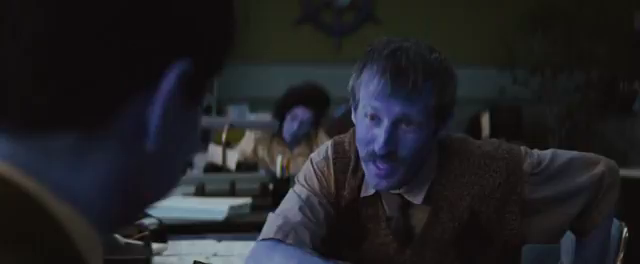

In [ ]:
b

In [ ]:
ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
gray_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#COLOR_BGR2RGB

In [ ]:
ret

True

array([[[17, 14, 13],
        [17, 14, 13],
        [17, 14, 13],
        ...,
        [18, 17, 11],
        [18, 17, 11],
        [18, 17, 11]],

       [[17, 14, 13],
        [17, 14, 13],
        [17, 14, 13],
        ...,
        [18, 17, 11],
        [18, 17, 11],
        [18, 17, 11]],

       [[17, 14, 13],
        [17, 14, 13],
        [17, 14, 13],
        ...,
        [18, 17, 11],
        [18, 17, 11],
        [18, 17, 11]],

       ...,

       [[24, 20, 16],
        [24, 20, 16],
        [24, 20, 16],
        ...,
        [14, 11, 12],
        [14, 11, 12],
        [14, 11, 12]],

       [[24, 20, 16],
        [24, 20, 16],
        [24, 20, 16],
        ...,
        [14, 11, 12],
        [14, 11, 12],
        [14, 11, 12]],

       [[24, 20, 16],
        [24, 20, 16],
        [24, 20, 16],
        ...,
        [14, 11, 12],
        [14, 11, 12],
        [14, 11, 12]]], dtype=uint8)
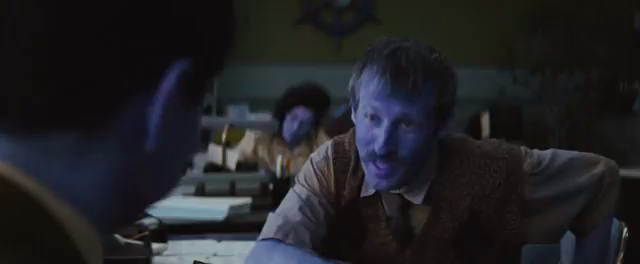

In [ ]:
test_img

array([[14, 14, 14, ..., 15, 15, 15],
       [14, 14, 14, ..., 15, 15, 15],
       [14, 14, 14, ..., 15, 15, 15],
       ...,
       [19, 19, 19, ..., 12, 12, 12],
       [19, 19, 19, ..., 12, 12, 12],
       [19, 19, 19, ..., 12, 12, 12]], dtype=uint8)
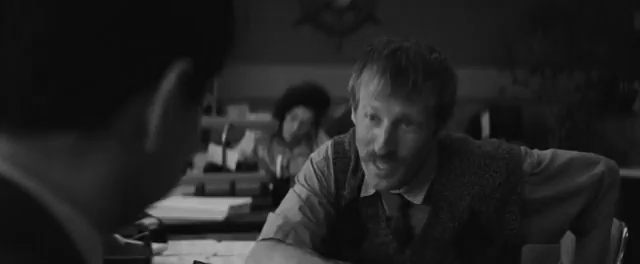

In [ ]:
gray_img

In [ ]:
faces_detected = face_haar_cascade.detectMultiScale(gray_img)

In [ ]:
faces_detected = face_haar_cascade.detectMultiScale(gray_img,1.1,2)

for (x,y,w,h) in faces_detected:
  cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),thickness=2)
  roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
  roi_gray=cv2.resize(roi_gray,(224,224))
  print(roi_gray.shape)
  img_pixels = image.img_to_array(roi_gray)
  img_pixels = np.expand_dims(img_pixels, axis = 0)
  img_pixels /= 255
  print(img_pixels.shape)



  #cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

resized_img = cv2.resize(test_img, (1000, 700))
from google.colab.patches import cv2_imshow
cv2_imshow(resized_img)


cap.release()
cv2.destroyAllWindows

(224, 224)
(1, 224, 224, 1)
(1, 224, 224, 1)


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 224, 224, 1)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 1), dtype=float32)
  • training=False
  • mask=None